# This Notebook is using Decision Tree Classifier
# with Accuracy of 100%

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zoo-animal-classification/class.csv
/kaggle/input/zoo-animal-classification/zoo.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
zoo_dir = "/kaggle/input/zoo-animal-classification/zoo.csv"
class_dir = "/kaggle/input/zoo-animal-classification/class.csv"

data_zoo = pd.read_csv(zoo_dir)
data_class = pd.read_csv(class_dir)

In [4]:
display(data_zoo.head())
display(data_class)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [5]:
class_types = list(data_class['Class_Type'])
class_types

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [6]:
class_map = {}
for i in range(data_class.shape[0]):        
    class_map[data_class['Class_Number'].iloc[i]] = data_class['Class_Type'].iloc[i]
    
class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [7]:
print(f"Total animals in zoo data is {len(data_zoo['animal_name'].unique())}")
print(f"Total animal in class data is {data_class['Number_Of_Animal_Species_In_Class'].sum()}")

Total animals in zoo data is 100
Total animal in class data is 101


In [8]:
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [9]:
## Droping columns that are repeating and not useful
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


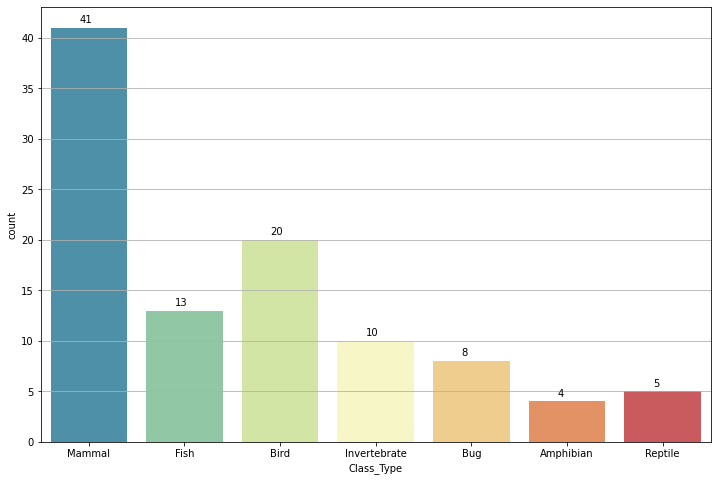

In [10]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

## Equal division of data w.r.t animal Type

While normall Splitting the data into Training and Test sets , there might be a case when all <br/>
the 4 Amphibians are in Train set or all the Amphibians are in Test set which will reduce our accuracy<br/>
So, what we will do is seprately split the data acoording to the animal type.


#### The zoo data from each class needs to be equally ditributed among Train and Test Data 

In [11]:
# Seperating all the categories of animals in a dictionary
animal_type = {}
animal_category = data.Class_Type.unique()
print("Seperating Categories...")
for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]
print("Seperation completed")

Seperating Categories...
Seperation completed


In [12]:
#Here we will split every category into trainig and test data
SPLIT = 0.85
train = pd.DataFrame() #to combine all the splited traning data from all categories
test = pd.DataFrame() #to combine all the splited test data from all categories
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT)
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])

#Shuffling the train and test data randomly
train = train.sample(frac=1)
test = test.sample(frac=1)

In [13]:
print(f"Training data shape = {train.shape}")
print(f"Training data shape = {test.shape}")

Training data shape = (83, 19)
Training data shape = (18, 19)


[]

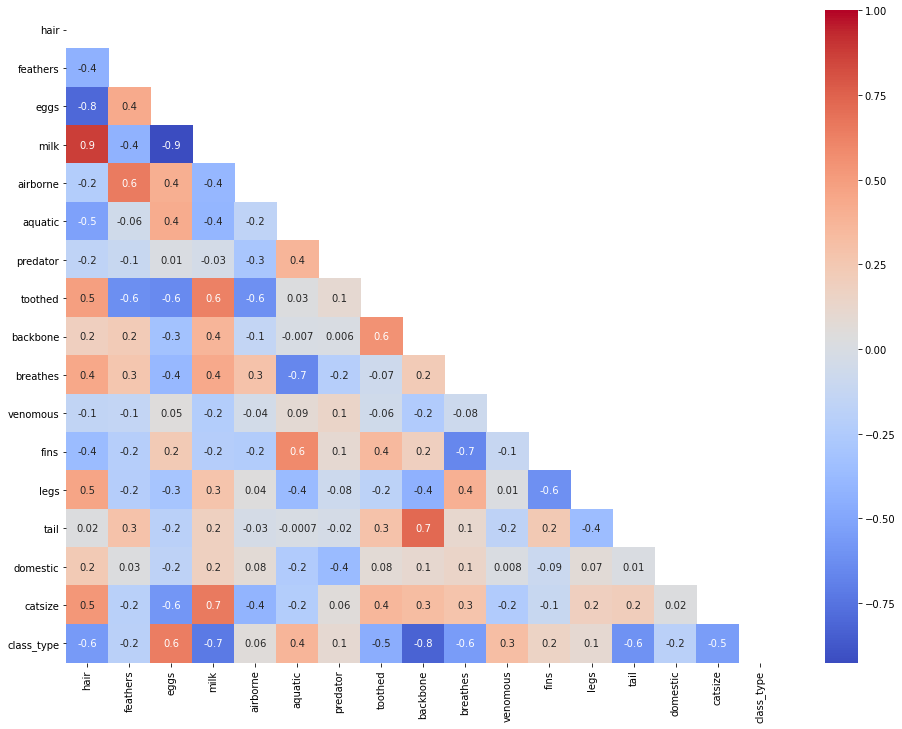

In [14]:
plt.figure(figsize=(16,12))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1g', mask=matrix)
plt.plot()

In [15]:
train.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
83,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,Bird
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,Fish
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,Bug
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2,Bird


## Classification using Decision Tree Classifier

In [16]:
# We have already split the data into 85% train and 15% test data
X_train = train.iloc[:,1:-2] # not using animal_name and class_type and Class_Type(category of animal)
y_train = train.iloc[:, -2] # class_type is the dependent feature
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [18]:
np.unique(y_pred), np.unique(y_test)
#To simply understand whether the prediction are atleast covering all the classes or not

(array([1, 2, 4, 5, 6, 7]), array([1, 2, 3, 4, 5, 6, 7]))

In [19]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

Accuracy = 0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        18
   macro avg       0.79      0.86      0.81        18
weighted avg       0.92      0.94      0.93        18



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
result = [class_map[i] for i in y_pred]
print("prediction values")
print(result)
print()
print("Real test y values")
print([class_map[i] for i in list(y_test)])

prediction values
['Fish', 'Amphibian', 'Bird', 'Mammal', 'Mammal', 'Invertebrate', 'Mammal', 'Fish', 'Invertebrate', 'Mammal', 'Bird', 'Bug', 'Bird', 'Mammal', 'Mammal', 'Bug', 'Amphibian', 'Mammal']

Real test y values
['Fish', 'Amphibian', 'Bird', 'Mammal', 'Mammal', 'Invertebrate', 'Mammal', 'Fish', 'Invertebrate', 'Mammal', 'Bird', 'Bug', 'Bird', 'Mammal', 'Mammal', 'Bug', 'Reptile', 'Mammal']


In [21]:
final_prediction_df = X_test
final_prediction_df['class_type'] = [class_map[i] for i in y_test]
final_prediction_df['pred_class_type'] = [class_map[i] for i in y_pred]
final_prediction_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,pred_class_type
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,Fish,Fish
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,Amphibian,Amphibian
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,Bird,Bird
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,Mammal,Mammal
74,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,Mammal,Mammal
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate,Invertebrate
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal,Mammal
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,Fish,Fish
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,Invertebrate,Invertebrate
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,Mammal,Mammal


In [22]:
X_train.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [23]:
X_train.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0


In [24]:
#tried manually with human feature values
predd = {}
predd['HAIR'] = 1
predd['FEATHERS'] = 0
predd['EGGS'] = 0
predd['MILK'] = 1
predd['AIRBORNE'] = 0
predd['AQUATIC'] = 0
predd['PREDATOR'] = 1
predd['TOOTHED'] = 1
predd['BACKBONE'] = 1
predd['BREATHES'] = 1
predd['VENOMOIS'] = 0
predd['FINS'] = 0
predd['LEGS'] = 2
predd['TAIL'] = 0
predd['DOMESTIC'] = 0
predd['CATSIZE'] = 0

pred_df = pd.DataFrame(data=predd, index=['value'])
custom_pred = clf.predict(pred_df)

In [25]:
class_map[custom_pred[0]]

'Mammal'

In [26]:
class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

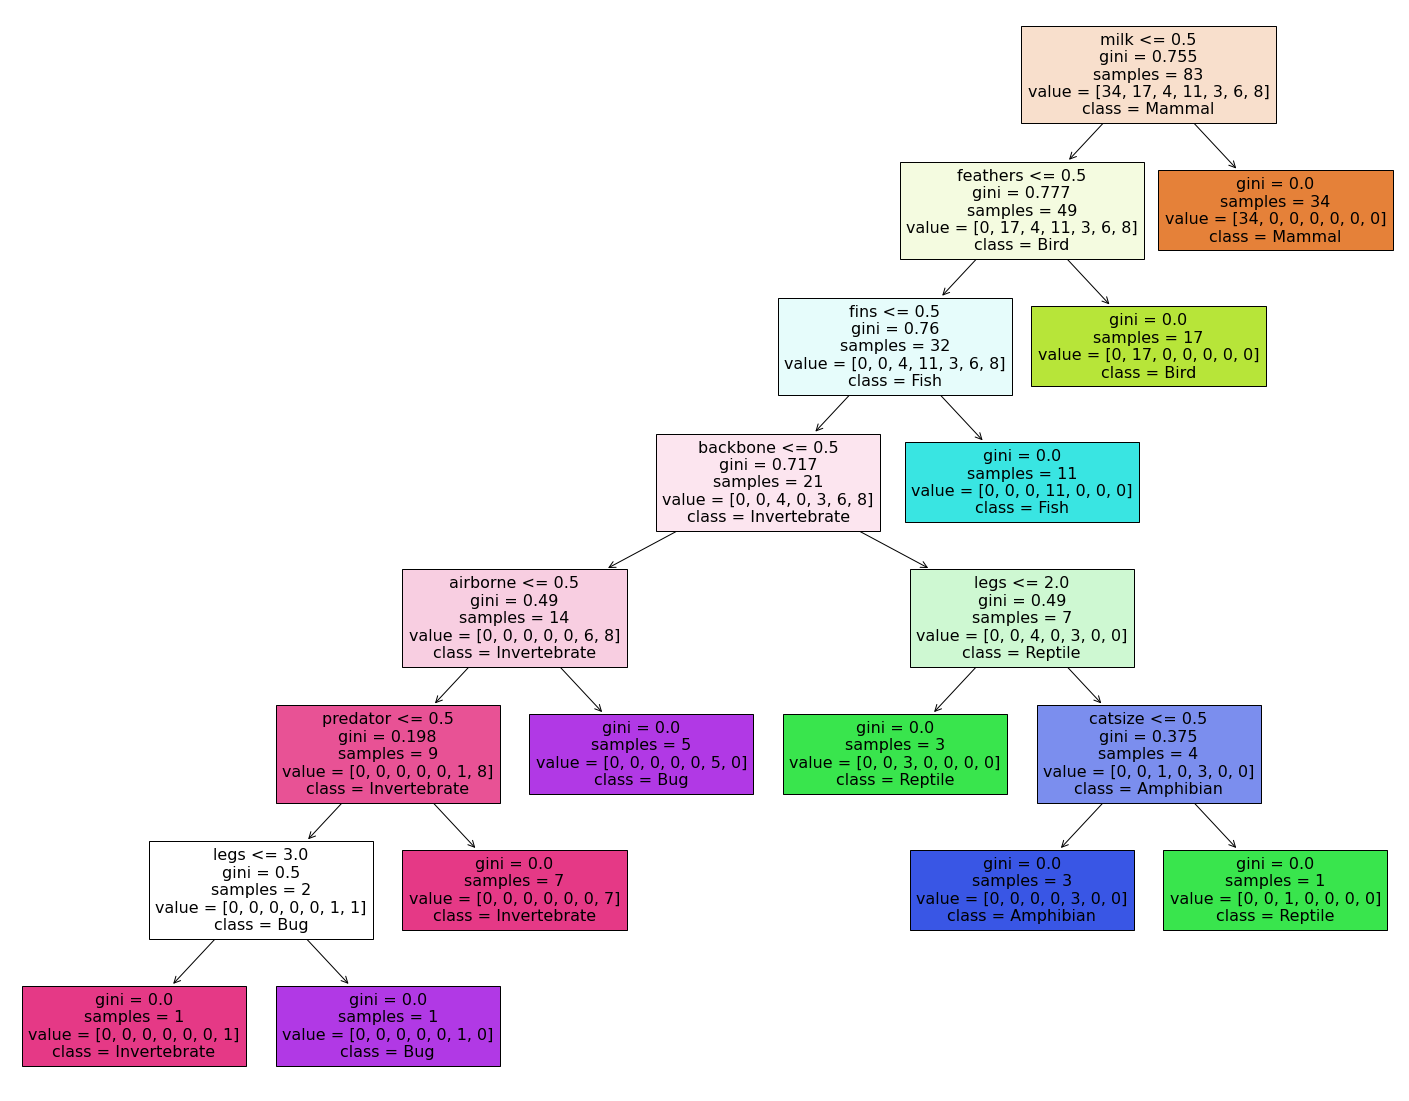

In [27]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X_train.columns,  
                class_names=class_types, filled=True)


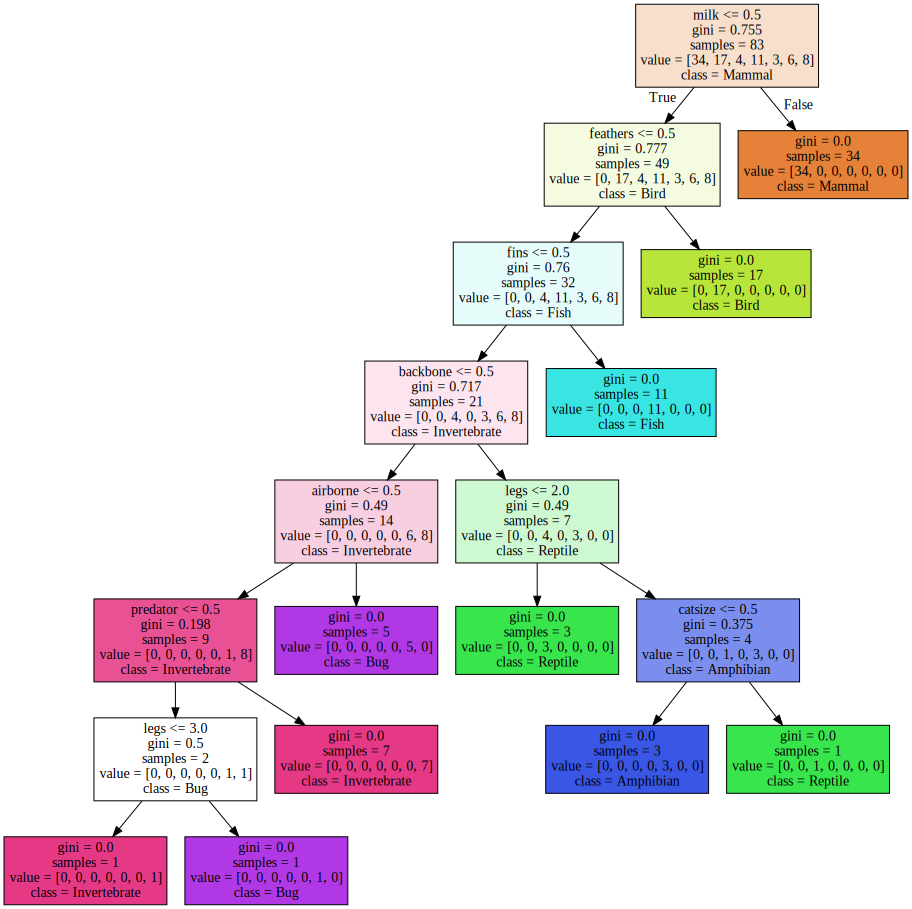

In [28]:
from sklearn.tree import export_graphviz
import graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=class_types,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [29]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

# And this is how we are getting a perfect accuracy of 100% with split of 0.8 or greater
Didn't try for split<0.8 You can check and update in the comment<br/>
Though sometimes the accuracy might lower but there's a very small difference between the amphibian and reptiles.<br/>
But restarting the kernel and running all again can make the accuracy back to 100%! 
### If you like this notebook Do UPVOTE!!!